Plot 'paths_plot.png' saved.
Plot 'action_plot.png' saved.


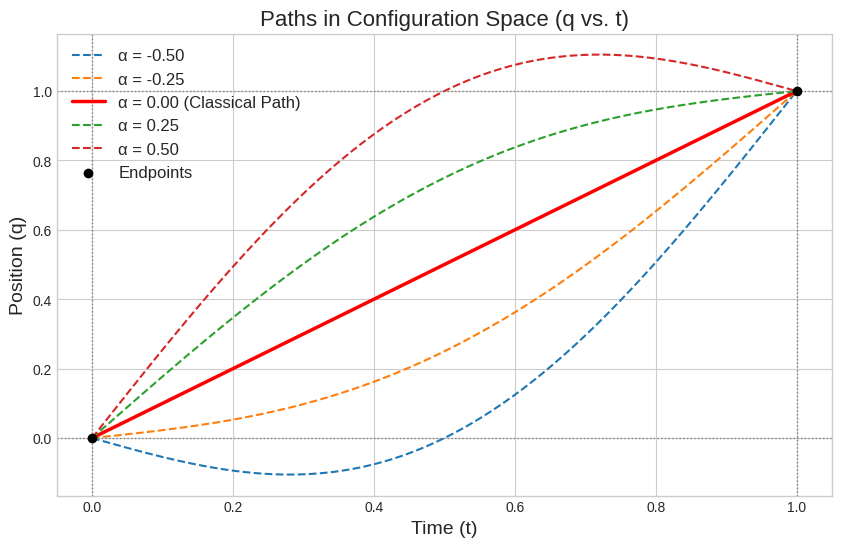

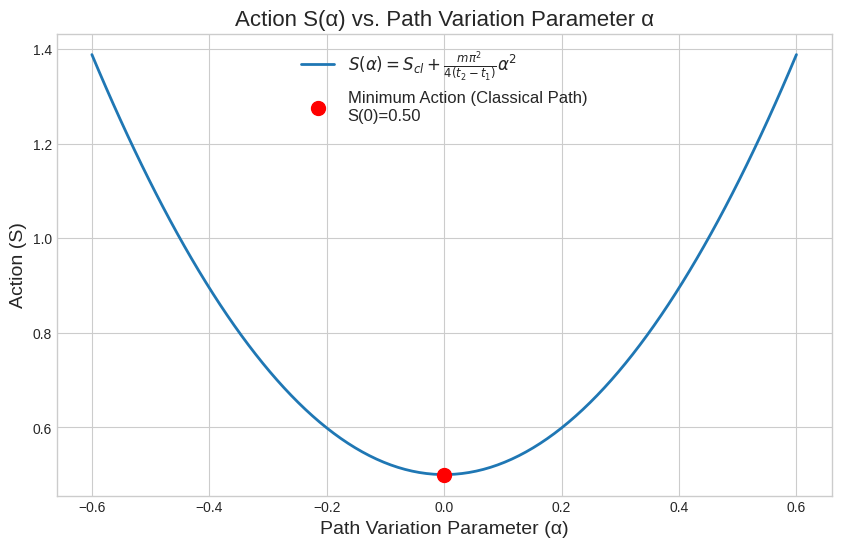

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stationary_action():
    """
    Generates and saves plots illustrating the Principle of Stationary Action
    for a free particle.
    """

    # Parameters
    m = 1.0  # mass
    t1, q1 = 0.0, 0.0  # initial spacetime point
    t2, q2 = 1.0, 1.0  # final spacetime point

    # Time array for plotting paths
    t_vals = np.linspace(t1, t2, 200)

    # 1. Classical Path
    # q_cl(t) = q1 + (q2 - q1) / (t2 - t1) * (t - t1)
    # For our specific values, q_cl(t) = t
    q_classical = t_vals

    # Velocity for classical path: (q2 - q1) / (t2 - t1) = 1
    # Action for classical path: S_cl = 0.5 * m * ((q2-q1)/(t2-t1))**2 * (t2-t1)
    S_classical = 0.5 * m * ((q2 - q1) / (t2 - t1))**2 * (t2 - t1)


    # 2. Varied Paths
    # q(t, alpha) = q_classical(t) + alpha * sin(pi * (t - t1) / (t2 - t1))
    # For our specific values, q(t, alpha) = t + alpha * sin(pi * t)

    alpha_values_for_paths = [-0.5, -0.25, 0.0, 0.25, 0.5] # Example alpha values for plotting paths

    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn-v0_8-whitegrid') # Using a nice style

    for alpha in alpha_values_for_paths:
        # Perturbation term: eta(t) = sin(pi * (t - t1) / (t2 - t1))
        eta_t = np.sin(np.pi * (t_vals - t1) / (t2 - t1))
        # Varied path
        q_varied = q_classical + alpha * eta_t

        label = f'α = {alpha:.2f}'
        if alpha == 0.0:
            label += ' (Classical Path)'
            plt.plot(t_vals, q_varied, label=label, linewidth=2.5, color='red')
        else:
            plt.plot(t_vals, q_varied, label=label, linestyle='--')

    plt.xlabel('Time (t)', fontsize=14)
    plt.ylabel('Position (q)', fontsize=14)
    plt.title('Paths in Configuration Space (q vs. t)', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.axvline(t1, color='gray', linestyle=':', lw=1)
    plt.axvline(t2, color='gray', linestyle=':', lw=1)
    plt.axhline(q1, color='gray', linestyle=':', lw=1)
    plt.axhline(q2, color='gray', linestyle=':', lw=1)
    plt.scatter([t1, t2], [q1, q2], color='black', zorder=5, label='Endpoints')
    plt.legend(fontsize=12) # Re-call legend to include scatter points
    plt.savefig('paths_plot.png')
    # plt.show() # Use plt.show() if running locally and want to see the plot immediately

    print("Plot 'paths_plot.png' saved.")

    # 3. Action S(alpha)
    # S(alpha) = S_classical + (1/4) * m * pi^2 * alpha^2 / (t2-t1)
    # For our specific values (t2-t1 = 1): S(alpha) = 0.5 + (pi^2 / 4) * alpha^2

    alpha_range_for_action = np.linspace(-0.6, 0.6, 100)

    # S_alpha = S_classical + (m * (np.pi**2) * (alpha_range_for_action**2)) / (4 * (t2 - t1))
    # Simplified for t2-t1 = 1
    S_alpha = S_classical + (m * (np.pi**2) * (alpha_range_for_action**2)) / 4.0

    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn-v0_8-whitegrid')

    plt.plot(alpha_range_for_action, S_alpha, label=r'$S(\alpha) = S_{cl} + \frac{m \pi^2}{4(t_2-t_1)} \alpha^2$', linewidth=2)
    plt.scatter([0], [S_classical], color='red', zorder=5, s=100, label=f'Minimum Action (Classical Path)\nS(0)={S_classical:.2f}')

    plt.xlabel('Path Variation Parameter (α)', fontsize=14)
    plt.ylabel('Action (S)', fontsize=14)
    plt.title('Action S(α) vs. Path Variation Parameter α', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.savefig('action_plot.png')
    # plt.show() # Use plt.show() if running locally

    print("Plot 'action_plot.png' saved.")

if __name__ == '__main__':
    plot_stationary_action()

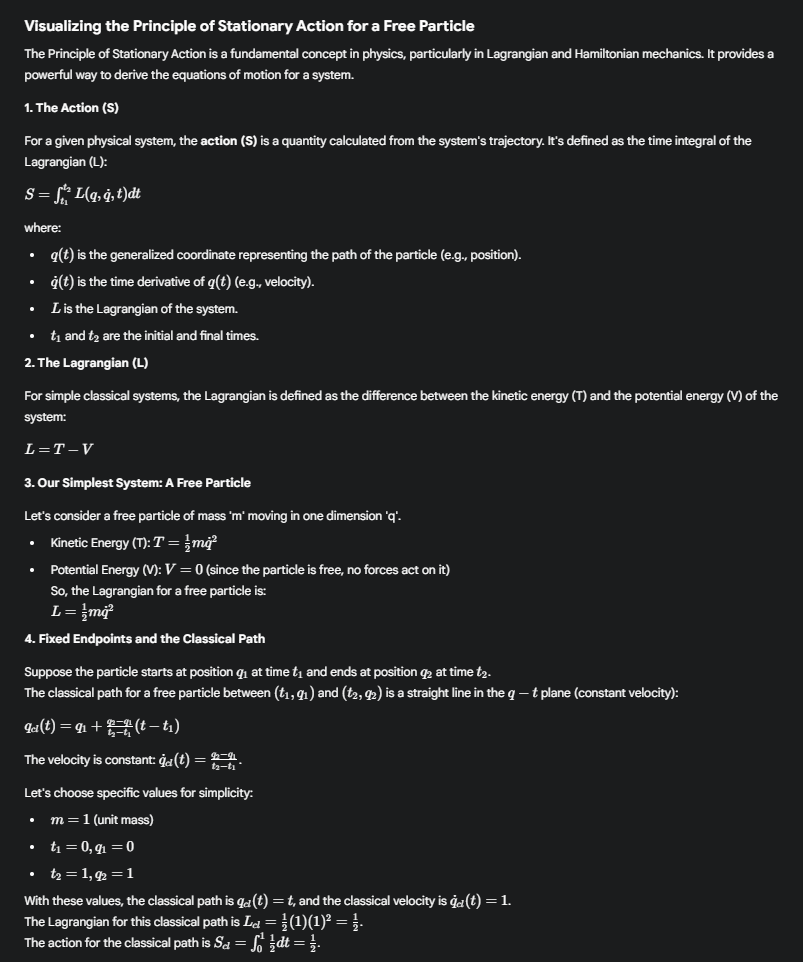

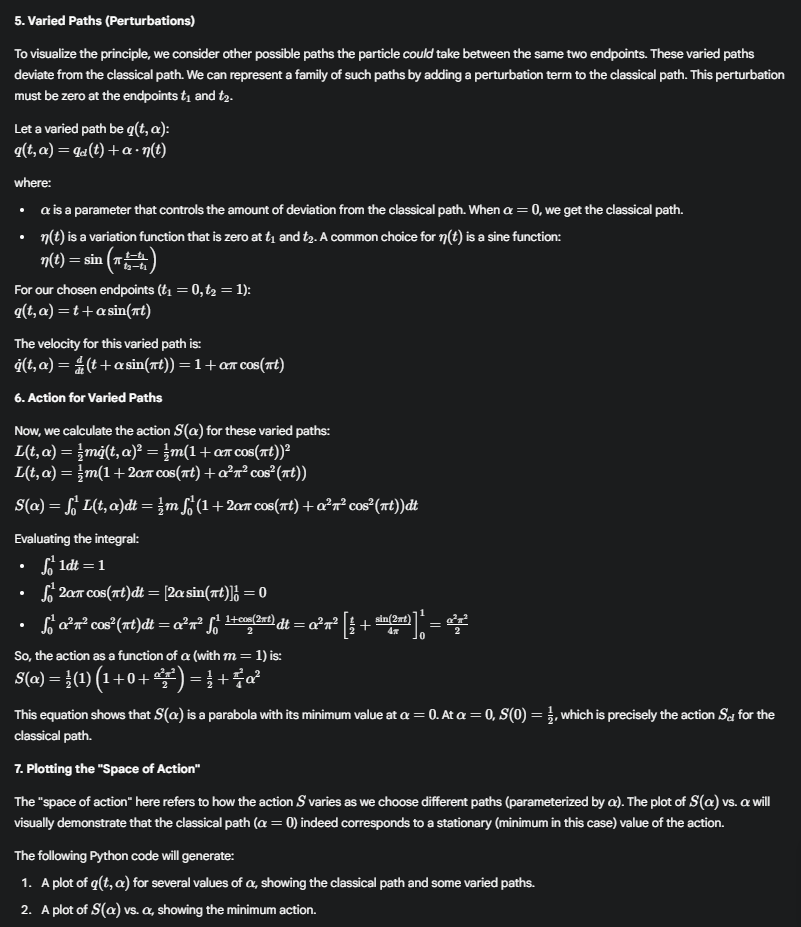